# Linear Regression: Basics
***Part [1/2]***

---

### Objectives
- Perform simple **EDA**.
    - *Correlation Matrix*
    - *Scatterplots*
    
    
- **Create a model** and training it on data.


- Read the basics from a *`statsmodels`* **model summary.**
    - $\large R^2$
    - $\large P\text{-values}$


- Make **predictions** on the data.
    - *Learn about **residuals** and simple **regression metrics**.*

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load in data.
df = pd.read_csv('../data/advertising.csv', index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## EDA
- *Correlation Matrix*

- *Scatterplots*

In [3]:
corr = (
    df
    .corr()
    .abs()
    .round(3)
)

corr

,TV,radio,newspaper,sales
TV,1.000,0.055,0.057,0.782
radio,0.055,1.000,0.354,0.576
newspaper,0.057,0.354,1.000,0.228
sales,0.782,0.576,0.228,1.000


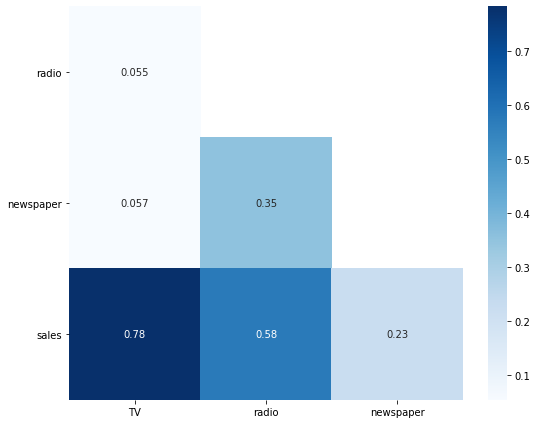

In [4]:
fig, ax = plt.subplots(figsize=(8,6))

# Set a 'mask' for the upper half of the heatmap. 
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, annot=True, mask=mask, cmap='Blues', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=0, ha="center",)
plt.setp(ax.get_yticklabels(), rotation=0)

# Fix the cutoff squares and remove empty row and column. 
ax.set_ylim(len(corr), 1)
ax.set_xlim(xmax=len(corr)-1)

fig.tight_layout()

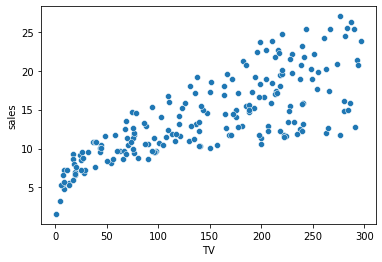

In [5]:
sns.scatterplot(x='TV', y='sales', data=df);

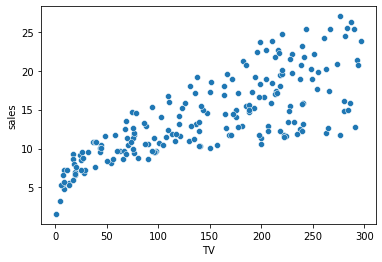

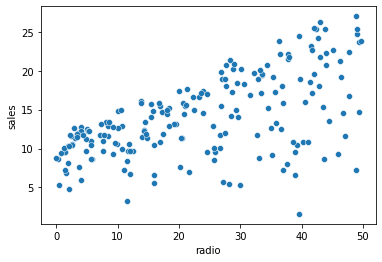

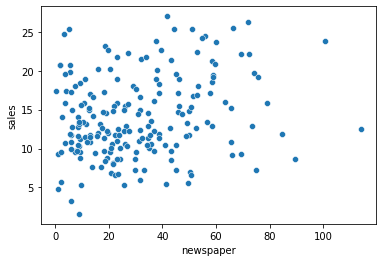

In [6]:
for c in df.columns:
    if c == 'sales':
        continue
    sns.scatterplot(x=c, y='sales', data=df);
    plt.show()

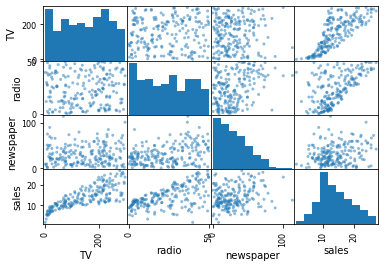

In [7]:
pd.plotting.scatter_matrix(df);

## Modeling

### Train a Model: Simple Linear Regression
> ***One*** *predictive feature.*

In [8]:
model = sm.OLS(df['sales'], df['TV']).fit()
model

In [9]:
# THIS IS WRONG! Why?
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Mon, 08 Aug 2022   Prob (F-statistic):                   3.52e-100
Time:                        16:59:33   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model = ols('sales~TV', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           1.47e-42
Time:                        16:59:33   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
y = df['sales']
X = sm.add_constant(df['TV'])

X.head()

,const,TV
1,1.0,230.1
2,1.0,44.5
3,1.0,17.2
4,1.0,151.5
5,1.0,180.8


In [12]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           1.47e-42
Time:                        16:59:33   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Train a Model: Multiple Linear Regression
> ***Multiple*** *predictive features.*

In [13]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [14]:
X = sm.add_constant(df.drop('sales', axis=1))

X

,const,TV,radio,newspaper
1,1.0,230.1,37.8,69.2
2,1.0,44.5,39.3,45.1
3,1.0,17.2,45.9,69.3
4,1.0,151.5,41.3,58.5
5,1.0,180.8,10.8,58.4
...,...,...,...,...
196,1.0,38.2,3.7,13.8
197,1.0,94.2,4.9,8.1
198,1.0,177.0,9.3,6.4
199,1.0,283.6,42.0,66.2


In [15]:
model = sm.OLS(y, X).fit()

#### Review Model Summary

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        16:59:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X = X.drop('newspaper', axis=1)

In [18]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           4.83e-98
Time:                        16:59:33   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Make Predictions

In [19]:
y_pred = model.predict(X)
y_pred

1      20.555465
2      12.345362
3      12.337018
4      17.617116
5      13.223908
         ...    
196     5.364512
197     8.152375
198    12.768048
199    23.792923
200    15.157543
Length: 200, dtype: float64

In [20]:
pred_df = X
pred_df['PRED'] = y_pred
pred_df.sort_values('TV', inplace=True)
pred_df

,const,TV,radio,PRED
131,1.0,0.7,39.6,10.397700
156,1.0,4.1,11.6,5.289428
79,1.0,5.4,29.9,8.789203
57,1.0,7.3,28.1,8.537748
127,1.0,7.8,38.9,10.590963
...,...,...,...,...
99,1.0,289.7,42.3,24.128426
36,1.0,290.7,4.1,16.992801
31,1.0,292.9,28.3,21.642922
43,1.0,293.6,27.7,21.562154


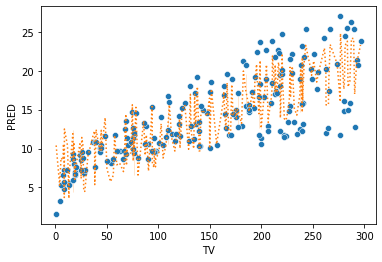

In [21]:
fig, ax = plt.subplots()
sns.lineplot(x='TV', y='PRED', data=pred_df, color='tab:orange', ls=':')
sns.scatterplot(x='TV', y='sales', data=df);

In [22]:
residuals = y_pred - y
residuals

1     -1.544535
2      1.945362
3      3.037018
4     -0.882884
5      0.323908
         ...   
196   -2.235488
197   -1.547625
198   -0.031952
199   -1.707077
200    1.757543
Length: 200, dtype: float64

In [23]:
# residuals ** 2